In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv(r'../data/country_wise_latest.csv')

print(df.head())
print(df.info())

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [61]:
# Remove the row where Country/Region is 'Israel'
df = df[df['Country/Region'] != 'Israel']

In [62]:
print("Missing values after cleaning:\n", df.isna().sum())

Missing values after cleaning:
 Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [63]:
# Total Global Cases, Deaths, and Recoveries have been calculated by summing all values across the dataset.
global_summary = df[['Confirmed', 'Deaths', 'Recovered']].sum()
print("Global Totals:\n", global_summary)

Global Totals:
 Confirmed    16416500
Deaths         653562
Recovered     9440954
dtype: int64


In [82]:
# Countries with Low New Cases (<10)
# This section filters and displays countries that reported fewer than 10 new COVID-19 cases.

low_new_cases = df[df['New cases'] < 10][['Country/Region', 'New cases']]
print("Countries with Low New Cases (<10):\n", low_new_cases)

Countries with Low New Cases (<10):
                        Country/Region  New cases
5                 Antigua and Barbuda          4
14                           Barbados          0
17                             Belize          0
18                              Benin          0
19                             Bhutan          4
24                             Brunei          0
27                              Burma          0
30                           Cambodia          1
33           Central African Republic          0
34                               Chad          7
38                            Comoros          0
45                             Cyprus          3
48                           Djibouti          9
49                           Dominica          0
54                  Equatorial Guinea          0
55                            Eritrea          2
56                            Estonia          0
59                               Fiji          0
60                            Fi

In [64]:
#Top 10 Countries by Confirmed Cases have been extracted and visualized using a bar chart.
# Sort and select the top 10 countries with the highest confirmed cases

top_10_confirmed = df[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(10)
print("Top 10 Countries by Confirmed Cases:\n", top_10_confirmed)

Top 10 Countries by Confirmed Cases:
      Country/Region  Confirmed
173              US    4290259
23           Brazil    2442375
79            India    1480073
138          Russia     816680
154    South Africa     452529
111          Mexico     395489
132            Peru     389717
35            Chile     347923
177  United Kingdom     301708
81             Iran     293606


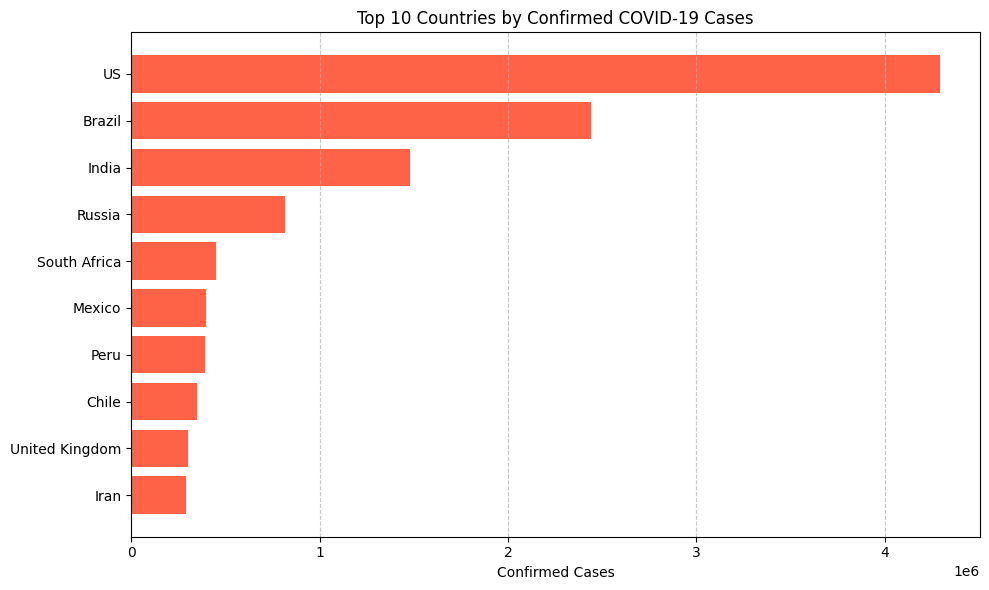

In [65]:
# Plot the results
plt.figure(figsize=(10,6))
plt.barh(top_10_confirmed['Country/Region'], top_10_confirmed['Confirmed'], color='tomato')
plt.xlabel('Confirmed Cases')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [66]:
# Top 10 Countries by New Cases — This code identifies the top countries with the highest number of new COVID-19 cases 

top_10_new_cases = df[['Country/Region', 'New cases']].sort_values(by='New cases', ascending=False).head(10)
print("Top 10 Countries by New Cases:\n", top_10_new_cases)

Top 10 Countries by New Cases:
     Country/Region  New cases
173             US      56336
79           India      44457
23          Brazil      23284
37        Colombia      16306
132           Peru      13756
154   South Africa       7096
138         Russia       5607
111         Mexico       4973
6        Argentina       4890
13      Bangladesh       2772


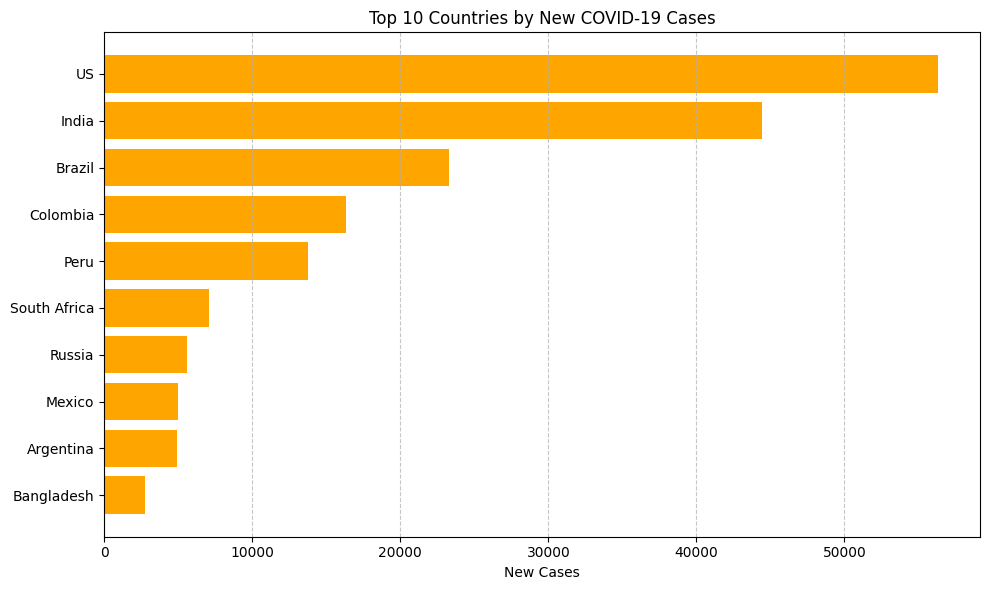

In [67]:
# Plot the results
plt.figure(figsize=(10,6))
plt.barh(top_10_new_cases['Country/Region'], top_10_new_cases['New cases'], color='orange')
plt.xlabel('New Cases')
plt.title('Top 10 Countries by New COVID-19 Cases')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [68]:
# Global Mortality Rate is calculated as the percentage of total deaths out of total confirmed cases globally.

global_mortality = (df['Deaths'].sum() / df['Confirmed'].sum()) * 100
print(f"Global Mortality Rate: {global_mortality:.2f}%")

Global Mortality Rate: 3.98%


In [69]:
# Global Recovery Rate is calculated as the percentage of total recoveries out of total confirmed cases globally.
global_recovery = (df['Recovered'].sum() / df['Confirmed'].sum()) * 100
print(f"Global Recovery Rate: {global_recovery:.2f}%")

Global Recovery Rate: 57.51%


In [70]:
#Countries with Zero Deaths
#This section filters countries where the number of deaths is zero and displays their confirmed and recovered cases.
zero_deaths = df[df['Deaths'] == 0][['Country/Region', 'Confirmed', 'Recovered']]
print("Countries with Zero Deaths:\n", zero_deaths)

Countries with Zero Deaths:
                        Country/Region  Confirmed  Recovered
19                             Bhutan         99         86
30                           Cambodia        226        147
49                           Dominica         18         18
55                            Eritrea        265        191
59                               Fiji         27         18
68                          Greenland         14         13
69                            Grenada         23         23
75                           Holy See         12         12
94                               Laos         20         19
114                          Mongolia        289        222
130                  Papua New Guinea         62         11
140             Saint Kitts and Nevis         17         15
141                       Saint Lucia         24         22
142  Saint Vincent and the Grenadines         52         39
148                        Seychelles        114         39
168        

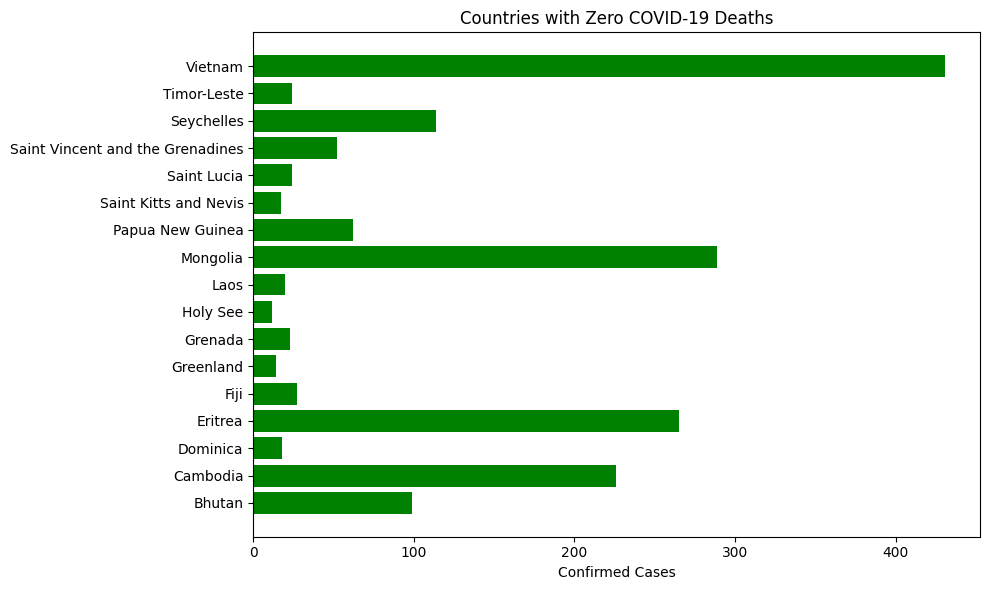

In [83]:
# Plot the results
plt.figure(figsize=(10,6))
plt.barh(zero_deaths['Country/Region'], zero_deaths['Confirmed'], color='green')
plt.xlabel('Confirmed Cases')
plt.title('Countries with Zero COVID-19 Deaths')
plt.tight_layout()
plt.show()

In [72]:
#Countries with Zero Deaths
#This section filters countries where the number of deaths is zero and displays their confirmed and recovered cases.

top_10_mortality = df[['Country/Region', 'Deaths / 100 Cases']].sort_values(by='Deaths / 100 Cases', ascending=False).head(10)
print("Top 10 Countries by Mortality Rate:\n", top_10_mortality)

Top 10 Countries by Mortality Rate:
      Country/Region  Deaths / 100 Cases
184           Yemen               28.56
177  United Kingdom               15.19
16          Belgium               14.79
85            Italy               14.26
61           France               13.71
77          Hungary               13.40
120     Netherlands               11.53
111          Mexico               11.13
157           Spain               10.44
183  Western Sahara               10.00


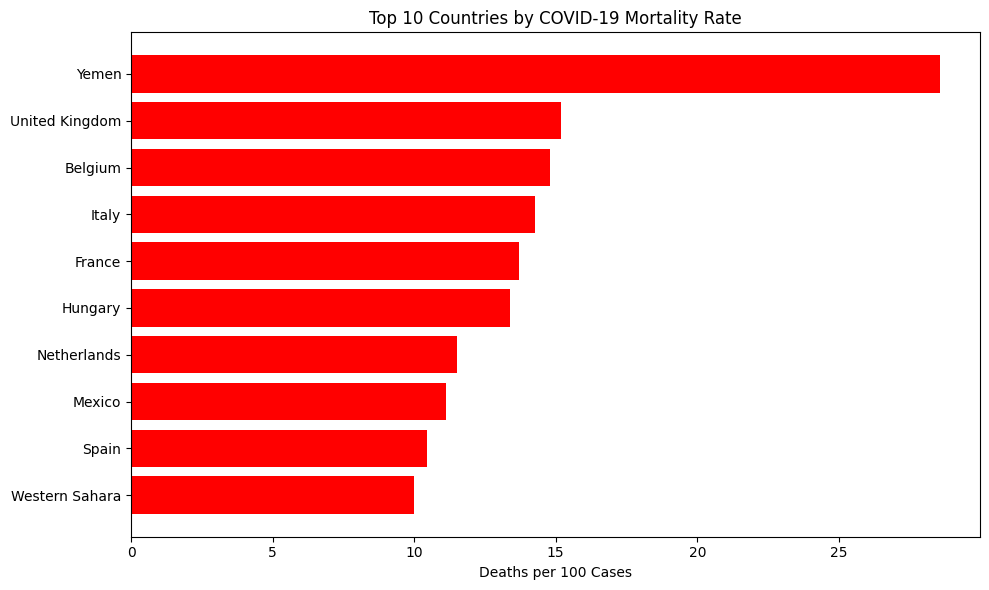

In [73]:
# Plot the results
plt.figure(figsize=(10,6))
plt.barh(top_10_mortality['Country/Region'], top_10_mortality['Deaths / 100 Cases'], color='red')
plt.xlabel('Deaths per 100 Cases')
plt.title('Top 10 Countries by COVID-19 Mortality Rate')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [74]:
# Top 10 Countries by Recovery Rate
# This section lists the top 10 countries with the highest recovery rate per 100 confirmed COVID-19 cases.

top_10_recovery = df[['Country/Region', 'Recovered / 100 Cases']].sort_values(by='Recovered / 100 Cases', ascending=False).head(10) 
print("Top 10 Countries by Recovery Rate:\n", top_10_recovery)

Top 10 Countries by Recovery Rate:
     Country/Region  Recovered / 100 Cases
49        Dominica                 100.00
69         Grenada                 100.00
75        Holy See                 100.00
48        Djibouti                  98.38
78         Iceland                  98.33
24          Brunei                  97.87
121    New Zealand                  97.24
136          Qatar                  97.02
105       Malaysia                  96.60
110      Mauritius                  96.51


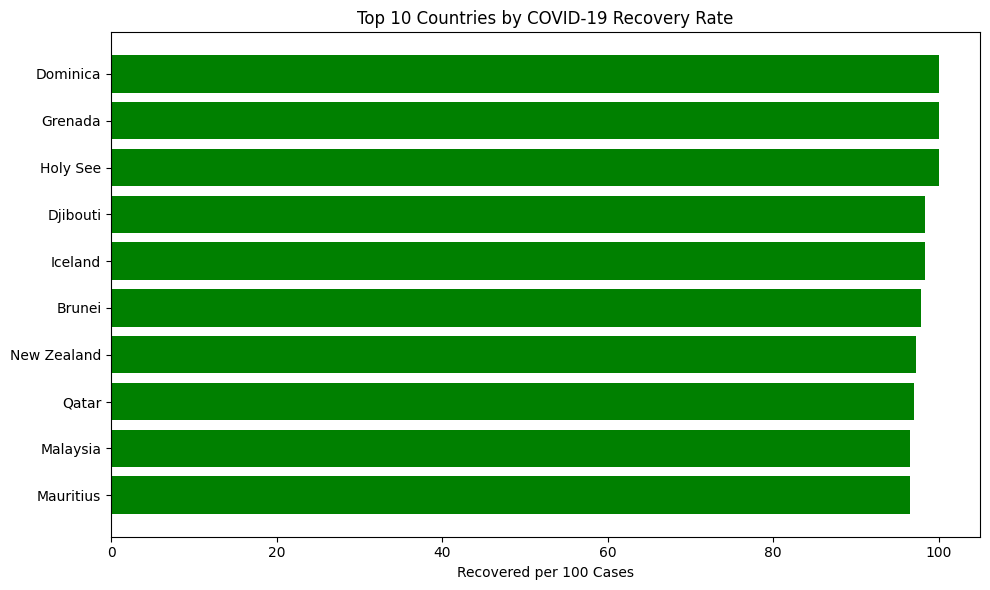

In [75]:
plt.figure(figsize=(10,6))
plt.barh(top_10_recovery['Country/Region'], top_10_recovery['Recovered / 100 Cases'], color='green')
plt.xlabel('Recovered per 100 Cases')
plt.title('Top 10 Countries by COVID-19 Recovery Rate')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [76]:
new_cases_by_region = df.groupby('WHO Region')['New cases'].sum().sort_values(ascending=False)
print("Daily New Cases by Region:\n", new_cases_by_region)

Daily New Cases by Region:
 WHO Region
Americas                 129531
South-East Asia           48993
Europe                    20265
Eastern Mediterranean     12410
Africa                    12176
Western Pacific            3289
Name: New cases, dtype: int64


In [77]:
#Shows countries with highest proportion of active cases.
df['Active %'] = (df['Active'] / df['Confirmed']) * 100
top_active = df[['Country/Region', 'Active %']].sort_values(by='Active %', ascending=False).head(5)
print("Top 5 Countries by Active Cases %:\n", top_active)

Top 5 Countries by Active Cases %:
     Country/Region    Active %
168    Timor-Leste  100.000000
117     Mozambique   99.353322
147         Serbia   97.750715
118        Namibia   94.085730
163          Syria   94.065282


In [78]:
high_cases_low_deaths = df[(df['New cases'] > 1000) & (df['New deaths'] < 20)][['Country/Region', 'New cases', 'New deaths']]
print("High New Cases, Low New Deaths:\n", high_cases_low_deaths)

High New Cases, Low New Deaths:
     Country/Region  New cases  New deaths
61          France       2551          17
89      Kazakhstan       1526           0
127           Oman       1053           9
133    Philippines       1592          13
137        Romania       1104          19


In [79]:
# Regional Summary (WHO Region)
# This section aggregates the total number of confirmed cases, deaths, and recoveries by WHO region
# and provides a comparative visualization using a bar chart.
region_summary = df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
print("Regional Summary:\n", region_summary)

Regional Summary:
                        Confirmed  Deaths  Recovered
WHO Region                                         
Africa                    723207   12223     440645
Americas                 8839286  342732    4468616
Eastern Mediterranean    1490744   38339    1201400
Europe                   3235538  210670    1966590
South-East Asia          1835297   41349    1156933
Western Pacific           292428    8249     206770


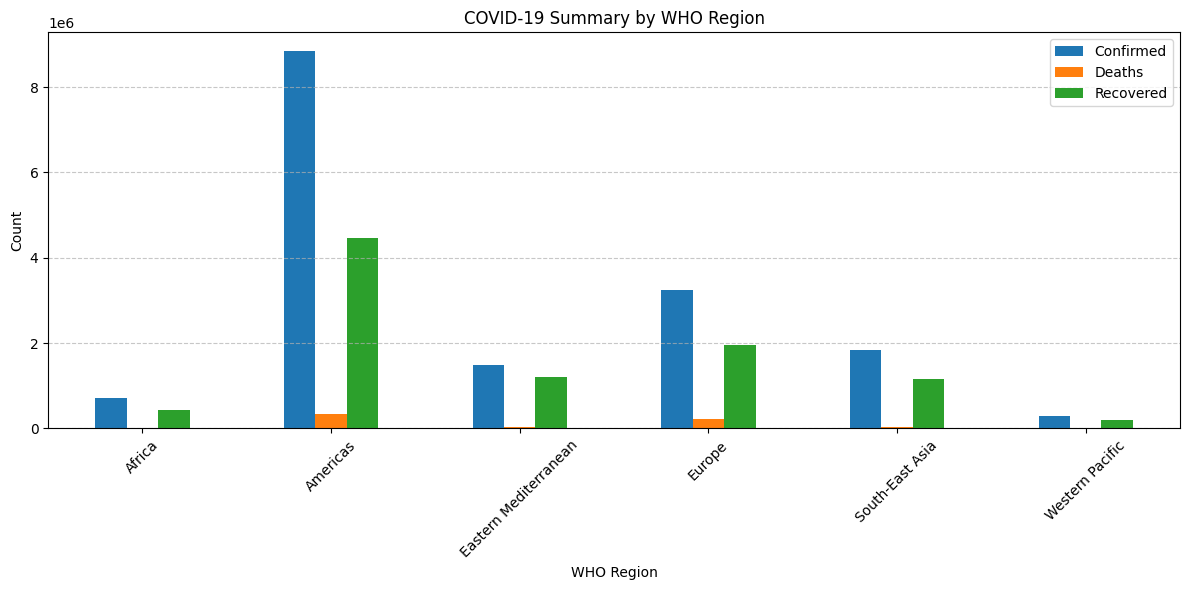

In [80]:
region_summary.plot(kind='bar', figsize=(12, 6))
plt.title('COVID-19 Summary by WHO Region')
plt.ylabel('Count')
plt.xlabel('WHO Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()